In [84]:
# Importing necessary libraries
import numpy as np
import pandas as pd

In [85]:
#Loading dataset
df = pd.read_csv('Plateau_Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Above is the Plateau Insurance data set

In [141]:
# Describing the data set (Data description)
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.682687,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.145674,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,14.000000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.315000,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.912515


In [87]:
# Checking for missing values
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [88]:
#Sum of the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [89]:
# Sum of values that are not missing
df.notnull().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [90]:
#Checking for duplicate values
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

# UNIVARIATE ANALYSIS

In [158]:
# Importing Visualization Libraries
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [93]:
# Selecting just sex data from data set
sex = df.groupby(['sex']).size().reset_index(name='Count')
sex

,sex,Count
0,female,662
1,male,676


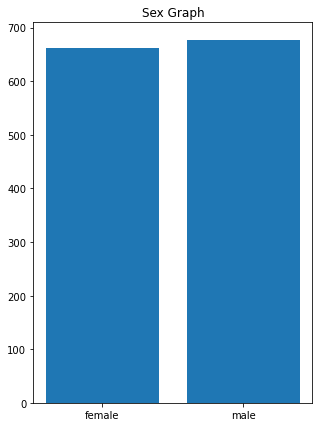

In [94]:
#Plotting a bar graph for sex categorical data
plt.figure(figsize = (5,7))
plt.title('Sex Graph')
plt.bar(sex['sex'], sex['Count'])
plt.show()

### From the bar graph above, it can be clearly seen that the data set has more females males 676(50.5%) than females 662(49.5%)

## SMOKER

In [95]:
smoker_freq = df.groupby(['smoker']).size().reset_index(name='Count')
smoker_freq

,smoker,Count
0,no,1064
1,yes,274


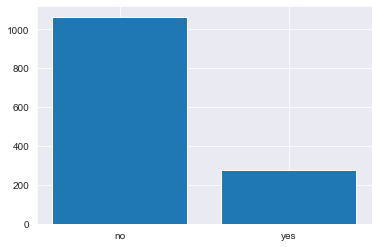

In [167]:
plt.bar(smoker_freq['smoker'], smoker_freq['Count'])
plt.show()

In [97]:
smoker_freq['Count%'] = smoker_freq['Count']/sum(smoker_freq['Count'])*100
smoker_freq

,smoker,Count,Count%
0,no,1064,79.521674
1,yes,274,20.478326


<function matplotlib.pyplot.show(close=None, block=None)>

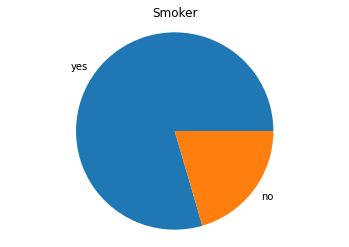

In [98]:
sizes = [1064, 274]
labels = 'yes', 'no'
plt.pie (sizes,
        labels = labels)
plt.title('Smoker')
plt.axis('equal')
plt.show

### From the bar and pie charts above, it was discovered that 1064	(79.5%) of the population were non smokers. While 274 (20.5%) are found to be smokers

In [99]:
# Selecting just the numerical data in the data set
df1 = df[['age', 'bmi', 'charges']]
df1.head()

,age,bmi,charges
0,21,16.000,3167.45585
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


## BMI

In [100]:
bmi = df.groupby(['bmi']).size().reset_index(name = 'Count')
bmi.head()

,bmi,Count
0,14.00,1
1,15.00,1
2,15.50,1
3,15.96,1
4,16.00,2


Text(0, 0.5, 'count')

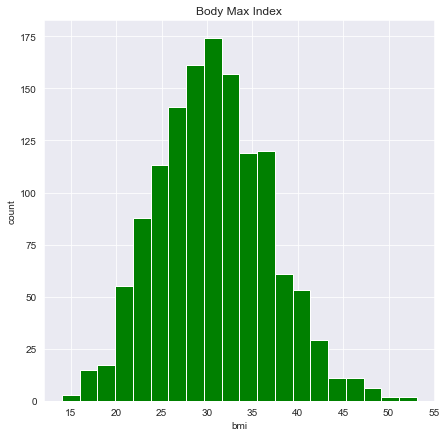

In [166]:
# A histogram visualizing data from the body mass index
plt.figure(figsize = (7,7))
x = df1['bmi']
plt.hist(x, bins=20, color='green')
plt.title('Body Max Index')
plt.xlabel('bmi')
plt.ylabel('count')

<AxesSubplot:>

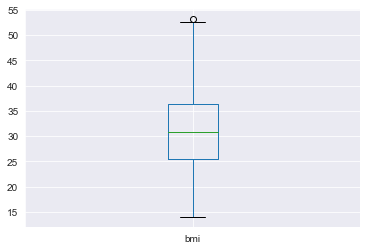

In [165]:
bmi.boxplot('bmi')

In [103]:
# Minimum, Maximum, Mean, Medium, Percentile (25th,50th and 75th) of BMI
Minimum = df1['bmi'].min(),
Maximum = df1['bmi'].max(),
Mean = df1['bmi'].mean(),
Median = df1['bmi'].median(),
Percentile_25th = np.percentile(df.bmi, 25),
Percentile_50th = np.percentile(df.bmi, 50,),
Percentile_75th = np.percentile(df.bmi, 75,),

In [104]:
Minimum, Maximum, Mean, Median, Percentile_25th, Percentile_50th, Percentile_75th,

((14.0,),
 (53.13,),
 (30.682686846038873,),
 (30.4,),
 (26.315,),
 (30.4,),
 (34.7,))

### From the analysis and visualizations above, it can be clearly seen that persons with Body Max Index of 30 had the highest count, with minimum value of 14.0, maximum value of 53.13, mean score of 30.6, median value of 30.4 and 25th,50th and 75th percentile values of 26.3, 30.4 and 34.7 respectively.

## CHARGES

In [105]:
charges = df.groupby(['charges']).size().reset_index(name = 'Count')
charges.head()

,charges,Count
0,1121.8739,1
1,1131.5066,1
2,1135.9407,1
3,1136.3994,1
4,1137.0110,1


Text(0, 0.5, 'count')

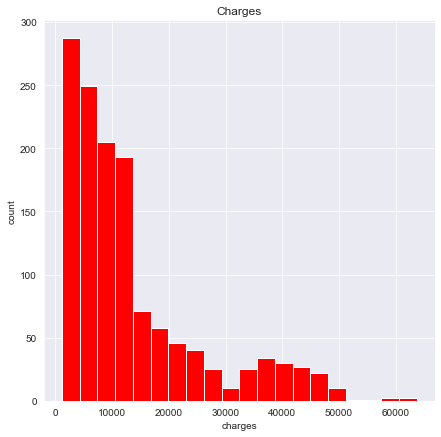

In [164]:
plt.figure(figsize = (7,7))
x = df1['charges']
plt.hist(x, bins=20, color='red')
plt.title('Charges')
plt.xlabel('charges')
plt.ylabel('count')

<AxesSubplot:>

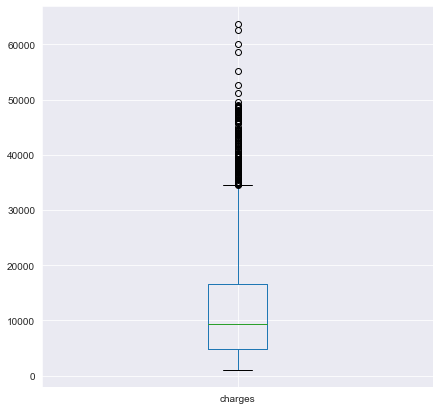

In [168]:
plt.figure(figsize = (7,7))
charges.boxplot('charges')

In [108]:
# Minimum, Maximum, Mean, Medium, Percentile (25th,50th and 70th) of Charges
Minimum = df1['charges'].min(),
Maximum = df1['charges'].max(),
Mean = df1['charges'].mean(),
Median = df1['charges'].median(),
Percentile_25th = np.percentile(df1.charges, 25,),
Percentile_50th = np.percentile(df1.charges, 50,),
Percentile_75th = np.percentile(df1.charges, 75,),

In [109]:
Minimum, Maximum, Mean, Median, Percentile_25th, Percentile_50th, Percentile_75th,

((1121.8739,),
 (63770.42801,),
 (13270.422265141258,),
 (9382.033,),
 (4740.28715,),
 (9382.033,),
 (16639.912515,))

## AGE

In [110]:
age = df.groupby(['age']).size().reset_index(name = 'Count')
age.head()

,age,Count
0,18,69
1,19,68
2,20,29
3,21,28
4,22,28


Text(0, 0.5, 'count')

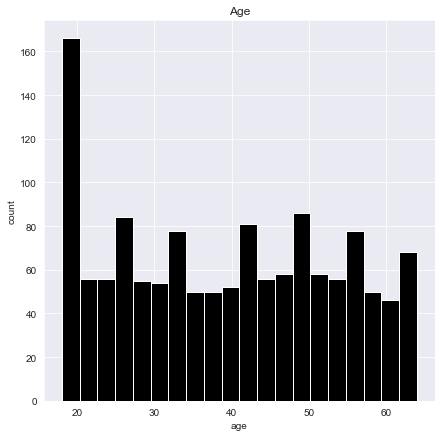

In [162]:
plt.figure(figsize = (7,7))
x = df1['age']
plt.hist(x, bins=20, color='black')
plt.title('Age')
plt.xlabel('age')
plt.ylabel('count')

<AxesSubplot:>

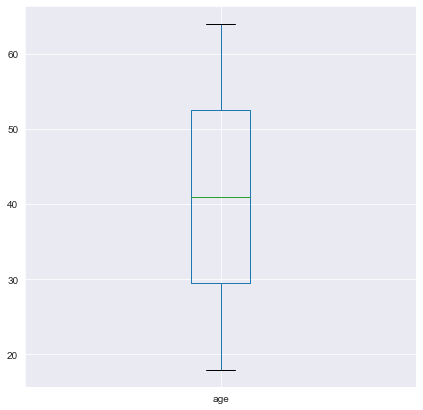

In [163]:
plt.figure(figsize = (7,7))
age.boxplot('age')

In [113]:
# Minimum, Maximum, Mean, Medium, Percentile (25th,50th and 70th) of Ages
Minimum = df1['age'].min(),
Maximum = df1['age'].max(),
Mean = df1['age'].mean(),
Median = df1['age'].median(),
Percentile_25th = np.percentile(df1.age, 25,),
Percentile_50th = np.percentile(df1.age, 50,),
Percentile_75th = np.percentile(df1.age, 75,),

In [114]:
Minimum, Maximum, Mean, Median, Percentile_25th, Percentile_50th, Percentile_75th,

((18,), (64,), (39.20702541106129,), (39.0,), (27.0,), (39.0,), (51.0,))

###  From the data and visualizations above, it can be clearly seen that persons within the age category of 20 had the highest count, with minimum age of 18, maximum of 64, mean score of 39.2, median value of 39.0 and 25th,50th and 75th percentile values of 27.0, 39.0 and 51.0 respectively.

# BIVARIATE ANALYSIS

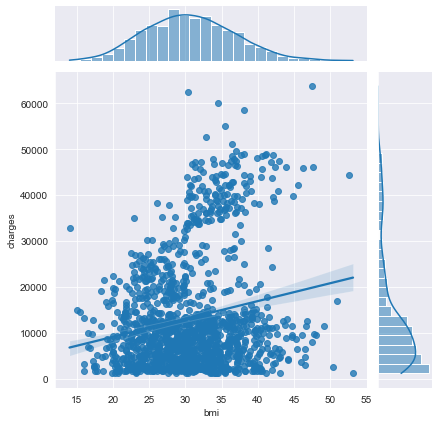

In [138]:
joint = sns.jointplot(data=df, x='bmi',y='charges', kind = 'reg')
plt.show()
joint

### From the joint plot visualization above it can be seen that there is a very weak positive correlation between Body Mass Index (BMI) and charges. This implies that hospital charges has just a little to do with the Body Mass Index  of its patients

In [136]:
sns.set_style('darkgrid')

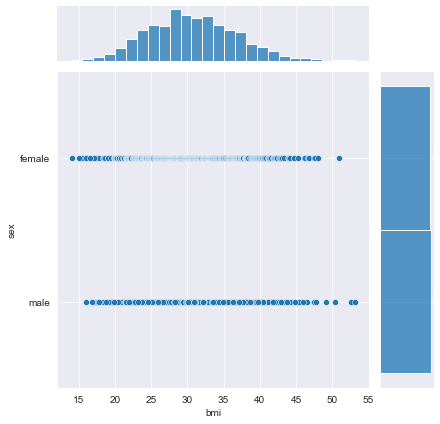

In [172]:
gf = sns.jointplot(data=df, x='bmi',y='sex',)
plt.show()
gf

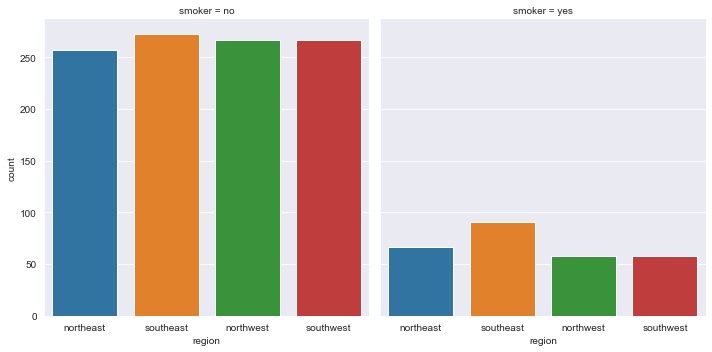

In [139]:
sns.catplot(data = df, x='region', col='smoker', kind='count',)

### From the visualizations and data above, it can be seen that the Southeast region has the most smokers

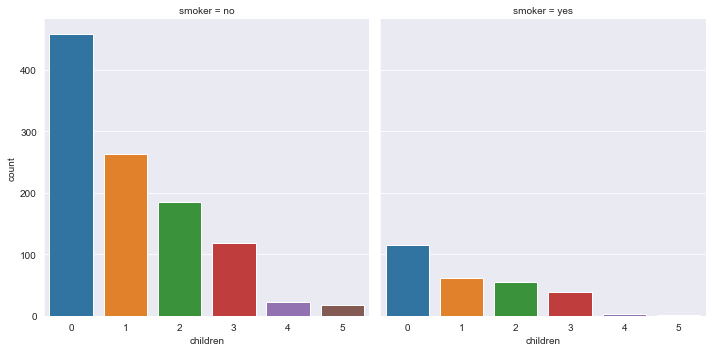

In [140]:
sns.catplot(data = df, x='children', col='smoker', kind='count',)

### From the data presented above it can be seen that the majority of smokers were the women with no children at all 574 (42.9% of the entire population)

# MULTIVARIATE ANALYSIS

In [125]:
# Numerical Variables from the dataset
multi = df.drop(columns = ['smoker', 'region', 'sex'])
multi

,age,bmi,children,charges
0,21,16.000,1,3167.45585
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,52,46.750,5,12592.53450
1335,54,47.410,0,63770.42801
1336,37,47.600,2,46113.51100


In [152]:
multi.describe(include = 'all')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


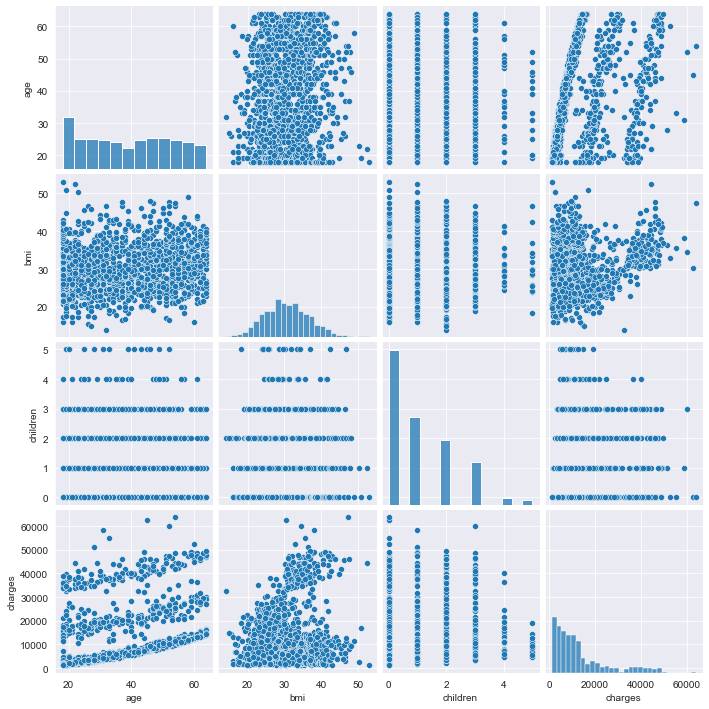

In [169]:
multi = sns.pairplot(multi)
multi

In [128]:
multi.corr()

,age,bmi,children,charges
age,1.000000,0.105845,0.042469,0.299008
bmi,0.105845,1.000000,0.007866,0.197842
children,0.042469,0.007866,1.000000,0.067998
charges,0.299008,0.197842,0.067998,1.000000


<AxesSubplot:>

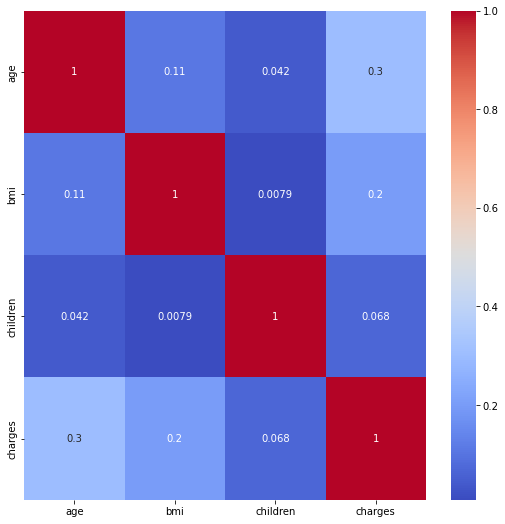

In [129]:
plt.figure(figsize = (9,9))
sns.heatmap(multi.corr(), annot=True, cmap = 'coolwarm')

### From the analysis and visualizations above, the following observations were made:
### 1. There is a very weak positive relationship between age and BMI.
### 2. There is also a weak positive relationship between age and number of children.
### 3. There is a moderate positive relationship between age and charges.
### 4. There is a very weak positive relationship between BMI and number of children.
### 5. There is a moderate positive relationship between BMI and charges.
### 6. There is a weak relationship between children and charges.